# Inferência Estatística (GCC1625) - Trabalho 3
- Nome completo: ANA CAROLINA SÁ COELHO DA SILVA
- Link para o vídeo: 

# (1) Correlação e covariância

Você é analista de dados de uma empresa de educação. Foram coletadas infor
mações sobre os seguintes atributos de alunos de um curso online:

- `horas_estudo`: número de horas que o aluno estudou na semana;
- `nota_final`: nota final no curso (de 0 a 100).

Seu objetivo é investigar a relação entre essas duas variáveis. Você deve usar
 os dados simulados gerados pelo bloco de código fornecido abaixo.

```python
import numpy as np
import pandas as pd

np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30)
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5, 30)

df = pd.DataFrame({
    'Horas de Estudo': horas_estudo,
    'Nota Final': nota_final
})



### (1.1) Cálculo Manual

1. Calcule a média de cada variável;
2. Calcule a covariância amostral usando a fórmula:

$$
\text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

3. Calcule a correlação de Pearson usando a fórmula:


$$\rho(X, Y) = \frac{\text{Cov}(X, Y)}{s_X s_Y}$$


Use  as funções `np.mean()`, `np.std()` e `np.cov()` para comparar com seus resultados.


In [1]:
import numpy as np
import pandas as pd

#simulacao de dados do enunciado
np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30)
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5, 30)
df = pd.DataFrame({
    'Horas de Estudo': horas_estudo,
    'Nota Final': nota_final
})

n = len(horas_estudo)

#medias manuais
media_horas_manual = np.sum(horas_estudo) / n
media_nota_manual = np.sum(nota_final) / n

#dp manual
desvio_horas_manual = np.sqrt(np.sum((horas_estudo - media_horas_manual) ** 2) / (n - 1))
desvio_nota_manual = np.sqrt(np.sum((nota_final - media_nota_manual) ** 2) / (n - 1))

#cov manual
cov_manual = np.sum((horas_estudo - media_horas_manual) * (nota_final - media_nota_manual)) / (n - 1)

#corr manual
correl_manual = cov_manual / (desvio_horas_manual * desvio_nota_manual)

#medias com funcoes
media_horas_np = np.mean(horas_estudo)
media_nota_np = np.mean(nota_final)

#cov com funcao
cov_numpy = np.cov(horas_estudo, nota_final, ddof=1)[0, 1]

#corr com funcao
correl_numpy = cov_numpy / (np.std(horas_estudo, ddof=1) * np.std(nota_final, ddof=1))

print(f"Média de Horas de Estudo (manual): {media_horas_manual:.4f} | (np.mean): {media_horas_np:.4f}")
print(f"Média da Nota Final (manual): {media_nota_manual:.4f} | (np.mean): {media_nota_np:.4f}")

print(f"\nCovariância Amostral (manual): {cov_manual:.4f}")
print(f"Covariância Amostral (np.cov): {cov_numpy:.4f}")

print(f"\nCorrelação de Pearson (manual): {correl_manual:.4f}")
print(f"Correlação de Pearson (com np.cov/np.std): {correl_numpy:.4f}")


Média de Horas de Estudo (manual): 9.6237 | (np.mean): 9.6237
Média da Nota Final (manual): 87.8890 | (np.mean): 87.8890

Covariância Amostral (manual): 13.7884
Covariância Amostral (np.cov): 13.7884

Correlação de Pearson (manual): 0.8557
Correlação de Pearson (com np.cov/np.std): 0.8557


**Explicação:** Utilizando as fórmulas para calcular manualmente, temos o mesmo resultado que utilizando as funções np.mean(), np.cov() e np.std().

As médias manuais foram calculadas com np.sum() / n.

A covariância manual foram calculadas com ` np.sum((horas_estudo - media_horas_manual) * (nota_final - media_nota_manual)) / (n - 1)`.

A correlação manual foi calculada com `cov_manual / (desvio_horas_manual * desvio_nota_manual)`, sendo esses desvios calculados manualmente com:

`desvio_horas_manual = np.sqrt(np.sum((horas_estudo - media_horas_manual) ** 2) / (n - 1))`

`desvio_nota_manual = np.sqrt(np.sum((nota_final - media_nota_manual) ** 2) / (n - 1))`

### (1.2) Visualização

1. Crie um **gráfico de dispersão** entre `horas_estudo` e `nota_final`;
2. Adicione uma **linha de tendência linear**;
3. Interprete o resultado: a relação é positiva, negativa ou nula?

```python
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

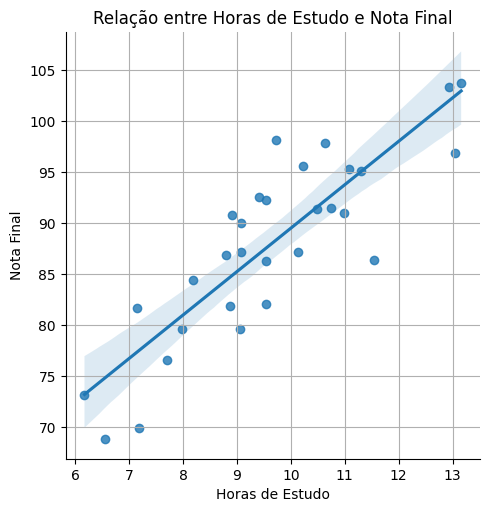

In [4]:
#codigo

import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

**Explicação:** A linha de tendência mostra uma inclinação positiva, indicando uma relação positiva entre as variáveis. Com isso, quanto mais horas de estudo, a tendência é de aumentar a nota final.

O gráfico foi plotado com a biblioteca seaborn e matplotlib.pyplot.

### (1.3) Interpretação


- O valor da correlação está mais próximo de 0, +1 ou -1? O que isso indica?
- A covariância obtida é positiva ou negativa? O que isso significa no contexto?
- Se a unidade da nota fosse alterada (ex: de 0-100 parqa 0-10), o valor da correlação mudaria? E a covariância?

**Respostas:**

O valor da correlação está mais próximo de +1, indicando uma correlação positiva forte entre as variáveis. Com isso, quando temos mais horas de estudo, temos notas finais maiores.

A covariância obtida é positiva. Nesse contexto, isso signifca que as variáveis tendem a variar na mesma direção. Se temos mais horas de estudo, temos maiores notas. Se temos menos horas, temos menores notas.

Se a unidade fosse alterada o valor da correlação não mudaria, pois a correlação de Pearson é adimensional e invariante a mudanças lineares de escala. Se mudarmos de 0-100 para 0-10, há uma preservação de direção da relação entre as variáveis, por exemplo. Quanto a covariância, teríamos uma mudança porque ela depende das unidades de medida.

### (1.4) Outras simulações

- Gere um novo conjunto de dados em que a correlação entre horas_estudo e nota_final seja próxima de zero;
- Gere um conjunto com correlação negativa entre as variáveis.

In [ ]:
#codigo

#simulacao de dados com correlacao prox de zero
np.random.seed(42)
horas_estudo_zero = np.random.normal(10, 2, 30) #loc, scale, size
nota_final_zero = np.random.normal(5, 10, 30)

#correlacao 0
correl_zero = np.corrcoef(horas_estudo_zero, nota_final_zero)[0, 1]
print(f"Correlação próxima de zero: {correl_zero:.4f}")

#simulacao de dados com correlacao negativa
np.random.seed(2)
horas_estudo_neg = np.random.normal(10, 2, 30)
nota_final_neg = 50 - 4 * horas_estudo_neg + np.random.normal(0, 5, 30)

correl_neg = np.corrcoef(horas_estudo_neg, nota_final_neg)[0, 1]
print(f"Correlação negativa: {correl_neg:.4f}")



Correlação próxima de zero: 0.0988
Correlação negativa: -0.7981


**Explicação:** 

Para gerar uma correlação próxima de 0, os números de nota_final_zero foram alterados de modo que não houvesse relação linear. Com isso, a correlação obtida foi de 0.0988.

Para gerar uma correlação negativa, foi preciso uma relação linear negativa, bastando inverter o sinal da relação linear feita em questão anterior. 

# (2) Regressão Linear Múltipla

Considere o conjunto de dados Auto1. O arquivo Auto.csv contém os dados para essa parte do trabalho. Esse arquivo está na plataforma MS Teams.

#### (i) Produza uma matriz de gráfico de dispersão que inclua todas as variáveis no conjuto de dados.



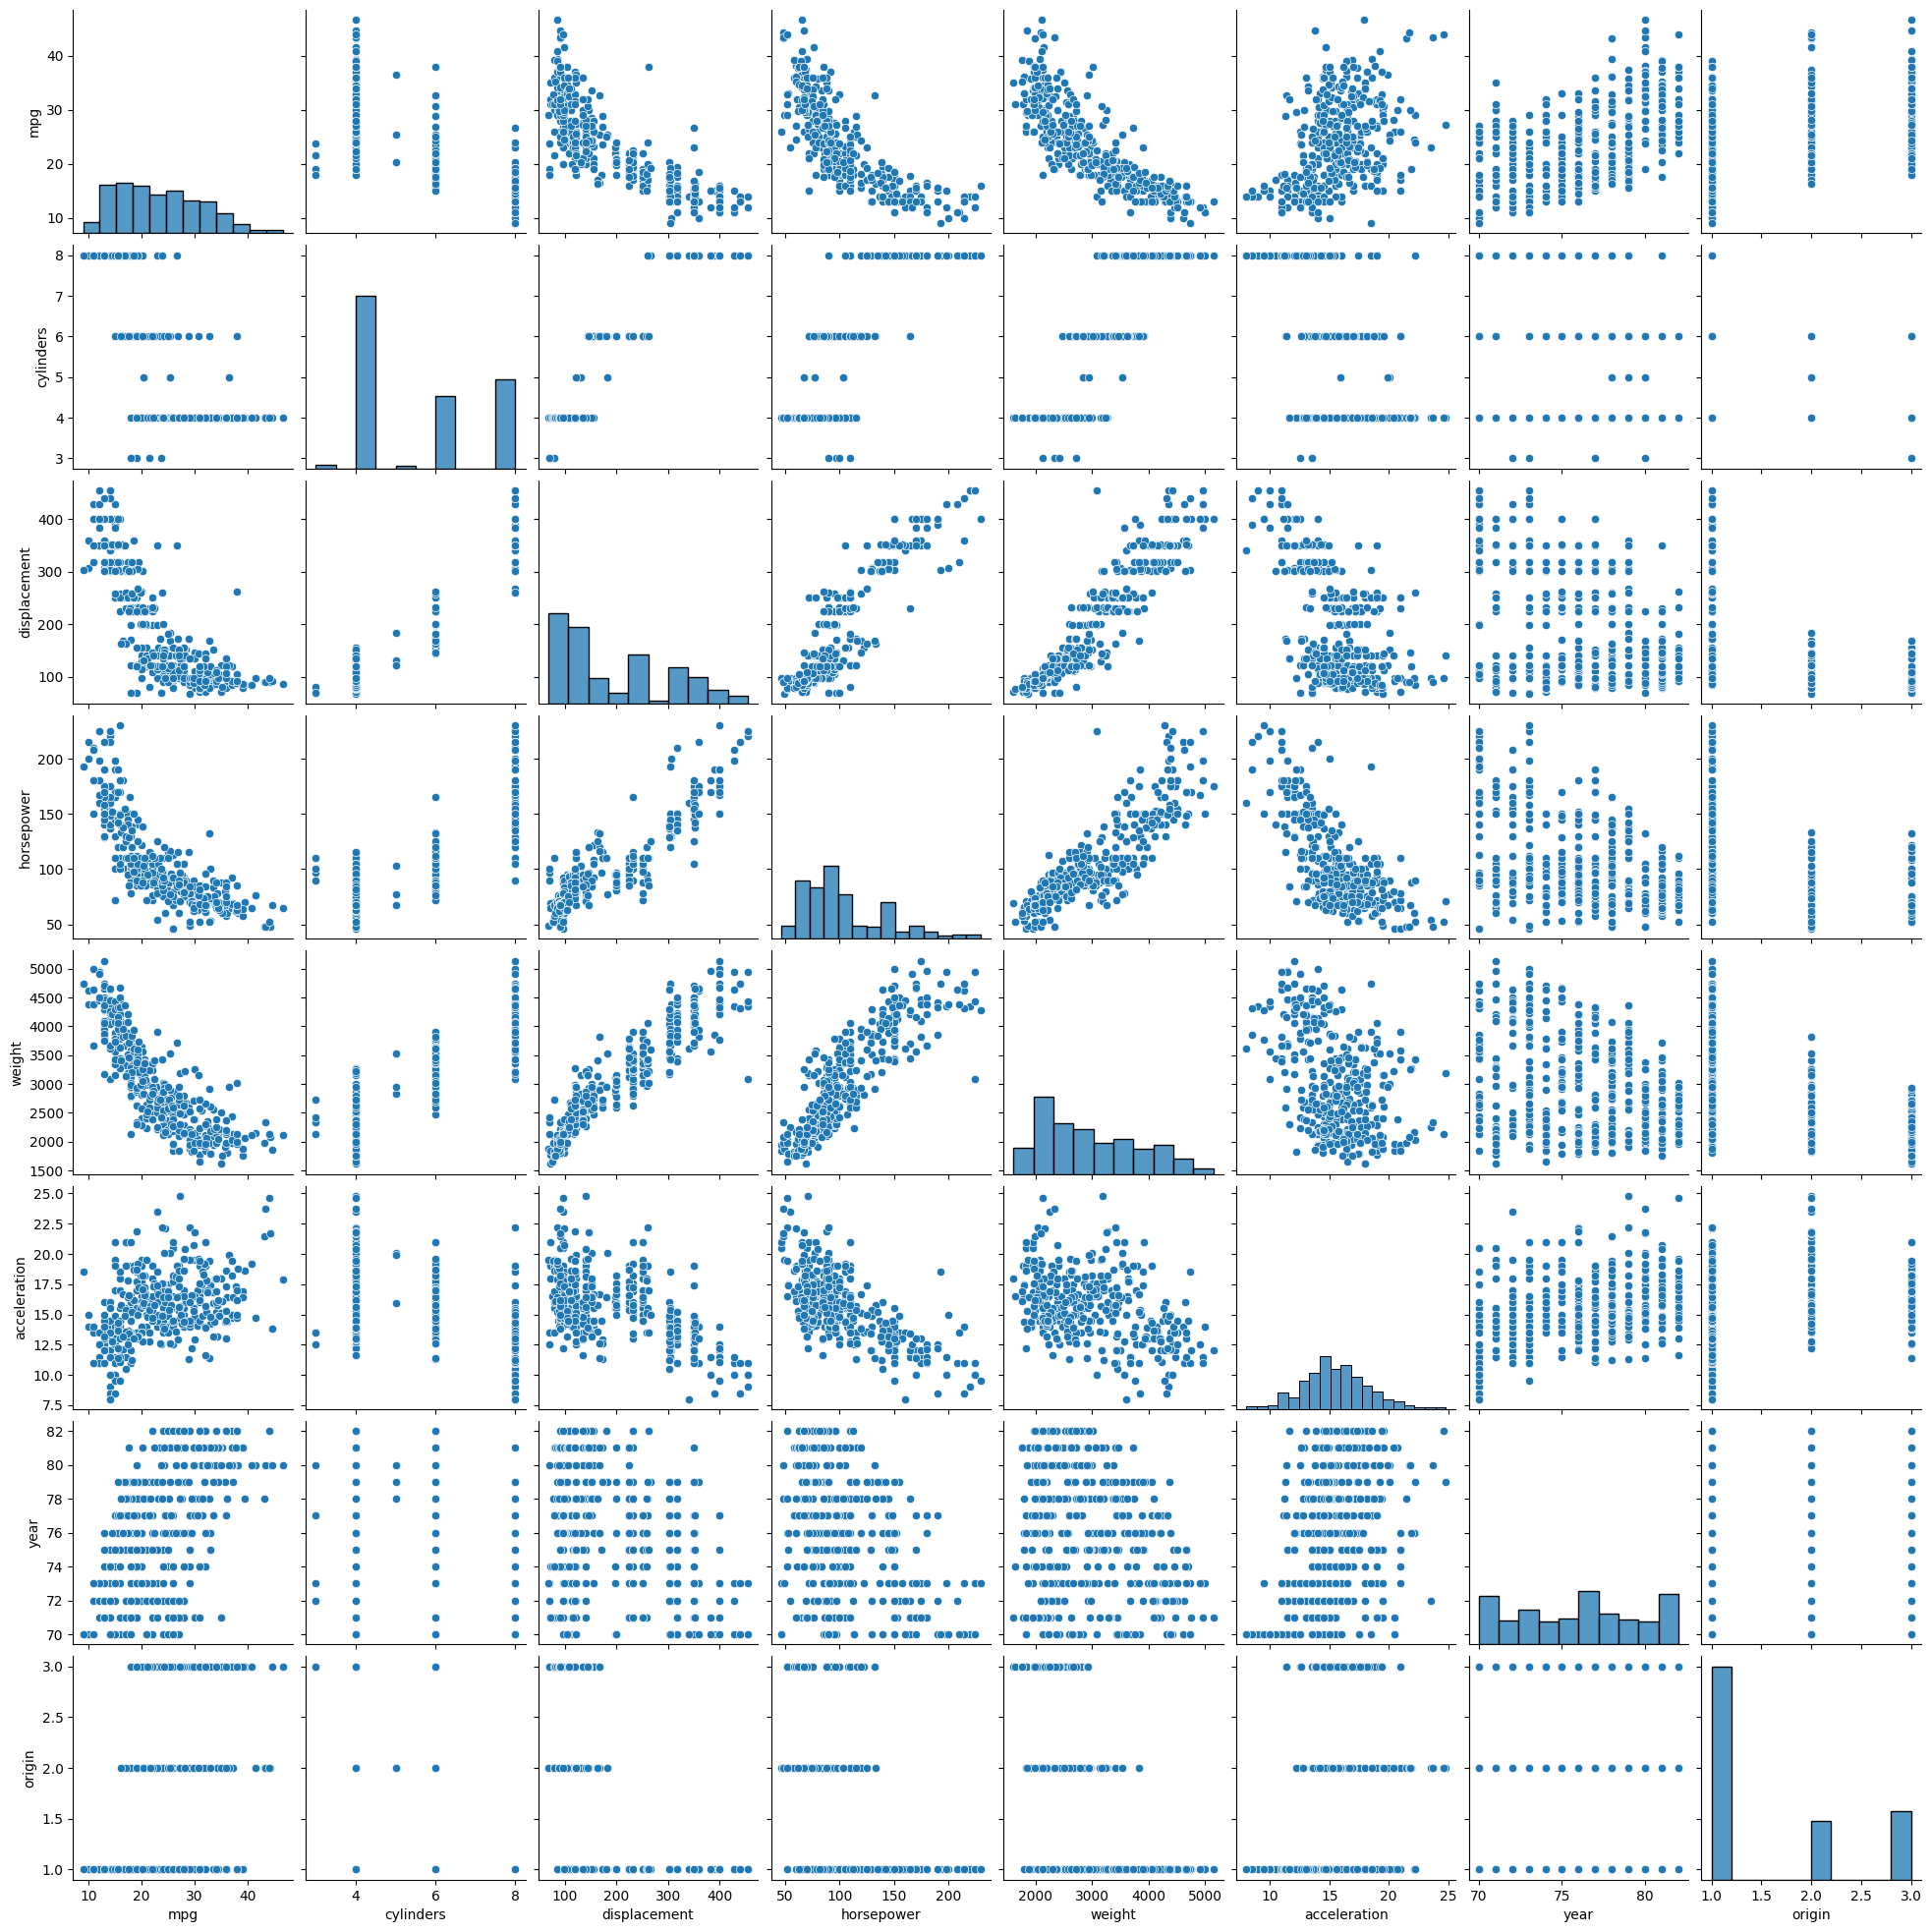

In [2]:
# codigo
from ISLP import load_data
import seaborn as sns
import matplotlib.pyplot as plt
Auto = load_data('Auto')
Auto.columns

sns.pairplot(Auto)
plt.show()


**Explicação:** O conjunto de dados foi obtido por meio da biblioteca ISLP e a matriz de gráficos de dispersão foi gerada com sns.pairplot(). Interpretando a matriz obtida, podemos observar relações de linearidade e algumas variáveis com muita correlação.

#### (ii) Calcule a matriz de correlações entre as variáveis usando a função corr() do pandas.DataFrame. Você precisará excluir a variável name, que é qualitativa.

In [3]:
#codigo
matriz_corr = Auto.corr()
print(matriz_corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

**Explicação:** Foi gerada a matriz de correlação para Auto usando Auto.corr().

Interpretação: Valores mais próximos de +1 significa uma correlação positiva entre as variáveis. Valores mais próximos de -1 representam uma correlação negativa e valores mais próximos de 0 representam que não há correlação linear entre as variáveis.

#### (iii) Use a função ols() da biblioteca statsmodels para realizar uma regressão linear múltipla com mpg como resposta e todas as outras variáveis (exceto nome) como os preditores. Use a função summary() para imprimir os resultados. Comente sobre a saída. Por exemplo:

(a) Existe uma relação entre os preditores e a resposta? 

(b) Quais preditores parecem ter um valor estatisticamente significativo com relação à resposta?

(c) O que sugere o coeficiente correspondente à variável ano?



In [7]:
#codigo

import statsmodels.api as sm
#var de resposta
Y = Auto['mpg']
#preditores
X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X=sm.add_constant(X)  #add constante para o intercepto
modelo = sm.OLS(Y, X).fit()  #modelo de regressao linear
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        22:42:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

**Explicação:** Como variável de resposta, foi utilizado mpg. Como variáveis preditoras, foram usadas todas as outras exceto nome, que é uma variável qualitativa. Com isso, o modelo foi feito com ols() e os resultados foram impressos.

**Comentários:**

(a) Existe **sim** uma relação entre os preditores e a resposta (mpg). Isso fica evidente avaliando R^2 = 0.821, o que significa que 82.1% da variação no consumo de mpg é explicada pelos preditores. Além disso, a F-statistic = 252.4 com Prob extremamente baixa nos dá um modelo altamente significativo.

(b) Os preditores estatisticamente significativos são os que possuem p-valor menor que 0.05. São elas: displacement, weight, year e origin.

(c) O coeficiente positivo da variável year sugere avanços tecnológicos ao longo dos anos, pois carros mais novos são mais eficientes energeticamente.

#### (iv) Use a função regplot da biblioteca seaborn para produzir gráficos de diagnóstico do ajuste de regressão linear. Comente sobre quaisquer problemas que você encontrar com o ajuste.

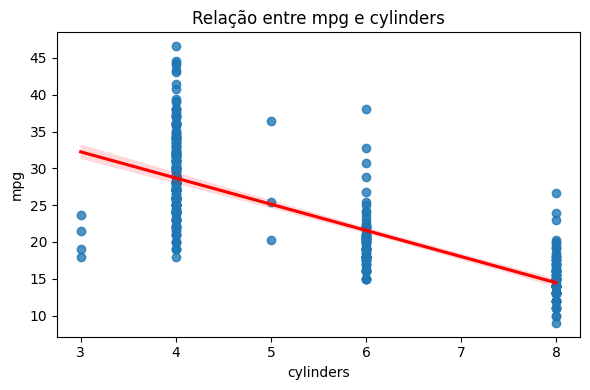

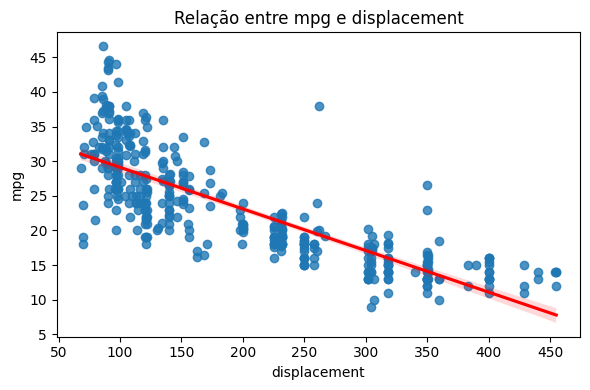

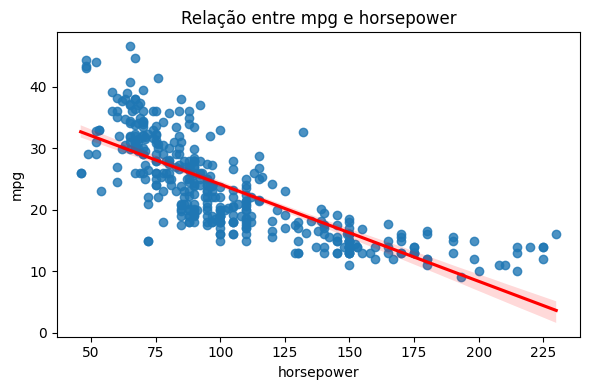

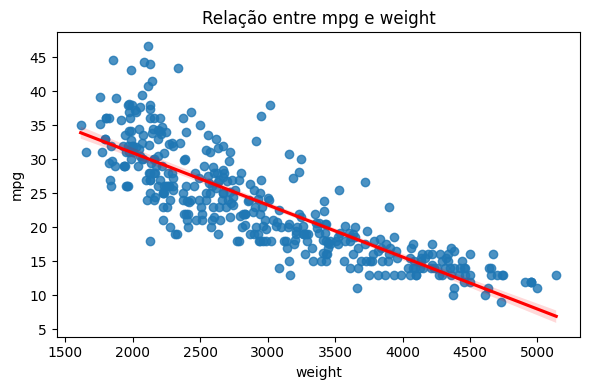

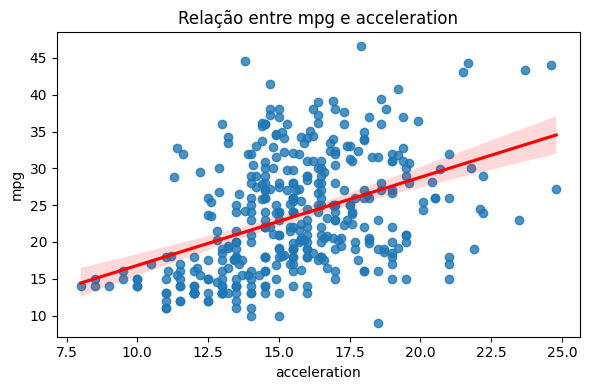

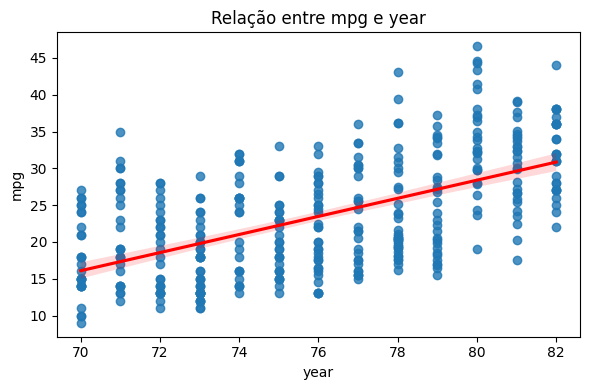

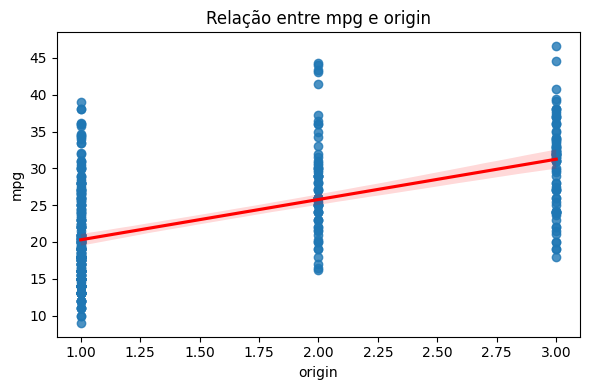

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#preditores significativos
variaveis = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

for var in variaveis:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=Auto[var], y=Auto['mpg'], line_kws={"color": "red"})
    plt.title(f'Relação entre mpg e {var}')
    plt.xlabel(var)
    plt.ylabel('mpg')
    plt.tight_layout()
    plt.show()


**Explicação:** Para gerar os gráficos, foi feita uma lista com as variáveis. Com isso, houve a iteração e, para cada uma, o gráfico com regplot foi feito. Analisando as variáveis significativas, temos:

- displacement x mpg: mostra uma correlação negativa, quanto maior os motores, menor será a economia. Há alguns outliers que fogem dessa tendência.
- weight x mpg: mostra uma correlação negativa, quanto maior o peso, menos será a economia. Também há alguns pontos fora dessa tendência.
- year x mpg: mostra uma correlação positiva, então quanto maior o ano (carros mais novos), maior será a economia.
- origin x mpg: mostra uma correlação positiva. Possível problema: como origin é uma variável categórica (1, 2 ou 3), o gráfico não é um bom informativo, pois os pontos não demonstram claramente.

## (3) DiD: Salário mínimo x taxa de empregos

Nesta parte, você irá replicar um estudo realizado originalmente por Card and Krueger [1994] sobre o efeito do aumento do salário mínimo sobre a taxa de empregos4. A teoria econômica convencional sugere que num mercado de trabalho com concorrência perfeita, um aumento no salário mínimo leva a um aumento no desemprego. Em abril de 1992, o estado americano de Nova Jersey (NJ) aumentou o salário mínimo (por hora) de US$ 4,25 para US$ 5,05. Card e Krueger (1994) utilizaram a técnica Difference-in-Difference (DiD) e mostraram que este aumento nos salários mínimos levou a um aumento no emprego no setor dos restaurantes de fast food. O grupo de controle utilizado nesse estudo foi o estado vizinho da Pensilvânia (PA), que não foi sujeito a essa mudança de política. Os autores realizaram uma pesquisa antes e depois do aumento do salário mínimo com uma amostra representativa de restaurantes de fast food em NJ e PA. Esta configuração pode ser considerada quase experimental, uma vez que ambos os estados não são idênticos em muitos aspectos e o processo legislativo, para aumentar o salário mínimo, não foi iniciado ao acaso. O arquivo card_krueger_1994_mod.csv contém os dados para essa parte do trabalho. Esse arquivo está na plataforma MS Teams.

#### (i) Reproduza o gráfico apresentado na Figura 1 do estudo supra-mencionado.

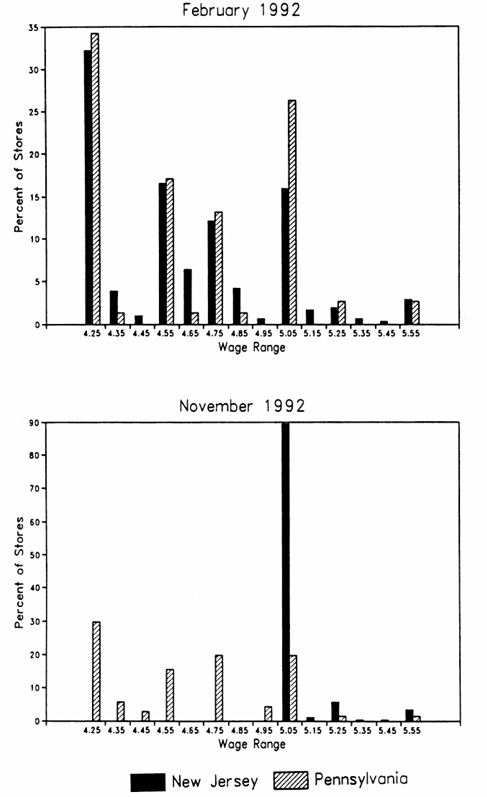

C:\Users\Ana Carolina\AppData\Local\Temp\ipykernel_36772\279596565.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df_filtrado.groupby(["faixa_salario", "state"]).size().unstack(fill_value=0)
C:\Users\Ana Carolina\AppData\Local\Temp\ipykernel_36772\279596565.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df_filtrado.groupby(["faixa_salario", "state"]).size().unstack(fill_value=0)


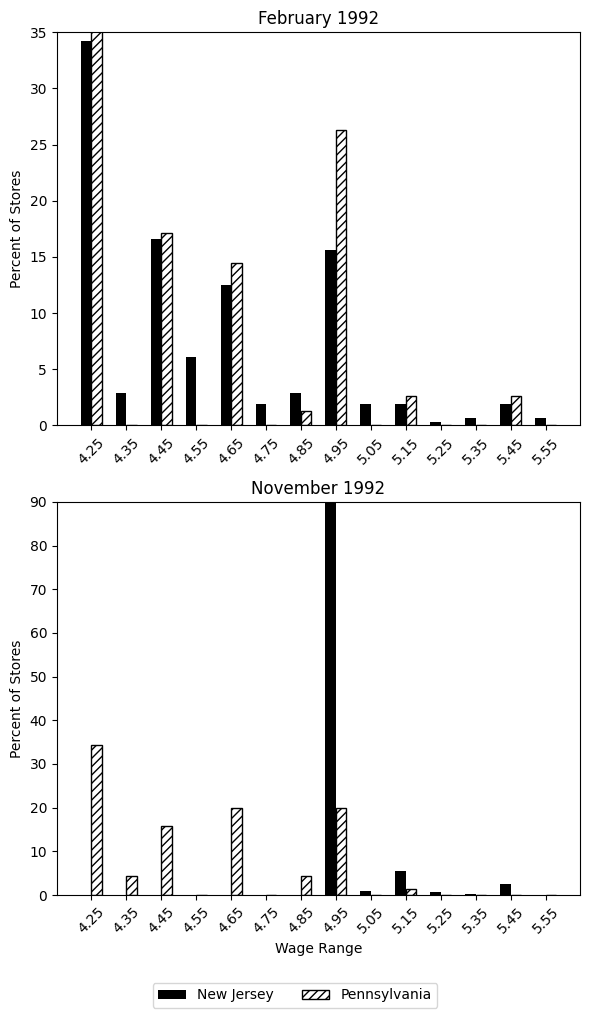

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Carregar dados
df_ck = pd.read_csv("card_krueger_1994_mod.csv")

# faixas de 4.25 até 5.55
bins = np.round(np.arange(4.25, 5.55 + 0.11, 0.10), 2)
labels = [f"{b:.2f}" for b in bins[:-1]]

# agrupar salários nas faixas
df_ck["faixa_salario"] = pd.cut(df_ck["wage_st"], bins=bins, labels=labels, right=True, include_lowest=True)

# função para calcular distribuição percentual
def get_dist_percent(df_filtrado):
    dist = df_filtrado.groupby(["faixa_salario", "state"]).size().unstack(fill_value=0)
    dist_percent = dist.divide(dist.sum(axis=0), axis=1) * 100
    return dist_percent

# filtrar por data
df_ck_fev = df_ck[df_ck["observation"] == "February 1992"]
df_ck_nov = df_ck[df_ck["observation"] == "November 1992"]

# obter distribuições
dist_fev = get_dist_percent(df_ck_fev)
dist_nov = get_dist_percent(df_ck_nov)
x = np.arange(len(dist_fev))
width = 0.3

# criar figura com dois subplots empilhados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

# gráfico de Fevereiro
ax1.bar(x - width/2, dist_fev["New Jersey"], width=width, color="black", label="New Jersey")
ax1.bar(x + width/2, dist_fev["Pennsylvania"], width=width, color="white", edgecolor="black", hatch="////", label="Pennsylvania")
ax1.set_title("February 1992")
ax1.set_ylabel("Percent of Stores")
ax1.set_xticks(x)
ax1.set_xticklabels(dist_fev.index, rotation=45)
ax1.set_ylim(0, 35)
ax1.set_yticks(np.arange(0, 36, 5))
ax1.grid(axis="y", linestyle=" ", alpha=0.5)

# gráfico de Novembro
ax2.bar(x - width/2, dist_nov["New Jersey"], width=width, color="black")
ax2.bar(x + width/2, dist_nov["Pennsylvania"], width=width, color="white", edgecolor="black", hatch="////")
ax2.set_title("November 1992")
ax2.set_xlabel("Wage Range")
ax2.set_ylabel("Percent of Stores")
ax2.set_xticks(x)
ax2.set_xticklabels(dist_nov.index, rotation=45)
ax2.set_ylim(0, 90)
ax2.set_yticks(np.arange(0, 91, 10))
ax2.grid(axis="y", linestyle=" ", alpha=0.5)

# legenda
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout()
plt.subplots_adjust(bottom=0.10) 
plt.show()


**Explicação:** Este código carrega dados salariais e plota dois gráficos de barras empilhados (um para fevereiro e outro para novembro de 1992), comparando a distribuição percentual de faixas salariais entre New Jersey e Pennsylvania. As faixas vão de $4.25 a $5.55, agrupadas em intervalos de $0.10. 


#### (ii) Calcule a estimativa DiD usando a abordagem de computar a diferença das médias. Ou seja, neste item você não deve usar a statsmodels para realizar a regressão. Use apenas Python (ou R) para computar as médias da variável de interesse para os dois grupos, antes e depois da intervenção.

In [84]:
#codigo
df_ck['observation'] = pd.to_datetime(df_ck['observation'])

intervencao = pd.Timestamp('1992-04-01')

#tratamento e período
df_ck['tratamento'] = df_ck['state'].apply(lambda x: 1 if x == 'New Jersey' else 0)
df_ck['periodo'] = df_ck['observation'].apply(lambda x: 1 if x >= intervencao else 0)

#media de emprego
media_employment = df_ck.groupby(['state', 'periodo'])['emptot'].mean()

#medias pra cada grupo
media_a = media_employment['New Jersey', 1] - media_employment['New Jersey', 0]
media_b = media_employment['Pennsylvania', 1] - media_employment['Pennsylvania', 0]

#diferenca
diferenca_das_medias = media_a - media_b

diferenca_das_medias


2.753605782980582

**Explicação:** 
O código transforma a coluna `observation` em formato de data e define duas variáveis: `tratamento`, que indica se o estado é New Jersey (1) ou não (0), e `periodo`, que distingue os dados antes e depois da intervenção (1 para após abril de 1992, 0 para antes). Em seguida, calcula a média de emprego (`emptot`) para cada grupo (New Jersey e Pennsylvania) nos dois períodos (antes e depois da intervenção). Finalmente, o código calcula a diferença das médias de emprego entre os períodos para cada estado e, por fim, calcula a diferença dessas diferenças entre os dois estados, fornecendo a estimativa DiD do efeito da intervenção.



#### (iii) Agora compute novamente a estimativa DiD, dessa vez utilizando a regressão linear. Para isso, você deve inicialmente criar duas variáveis dummy. Um indica o início do tratamento (tempo) e é igual a zero antes do tratamento e igual a um após o tratamento. A outra variável separa as observações em grupo de tratamento e grupo controle (tratado). Essa segunda variável dummy é igual a um para restaurantes fast food localizados em NJ e igual a zero para restaurantes fast food localizados no PA. Em seguida, crie a variável de interação multiplicativa. Finalmente, use a biblioteca statsmodels para gerar o modelo de regressão linear. Apresente sua análise e interpretação do resultado obtido

In [99]:
#codigo
import pandas as pd
import statsmodels.api as sm

#data em timestamp
data_tratamento = pd.Timestamp('1992-04-01')

#var tempo -> 1 após tratamento, 0 antes
df_ck['tempo'] = df_ck['observation'].apply(lambda x: 1 if x >= data_tratamento else 0)

# var tratamento -> 1 se New Jersey, 0 se Pennsylvania
df_ck['tratamento'] = df_ck['state'].apply(lambda x: 1 if x == 'New Jersey' else 0)

#interacao entre tempo e tratamento
df_ck['interacao'] = df_ck['tempo'] * df_ck['tratamento']

#vendo se tem valores nulos
df_ck = df_ck.dropna(subset=['emptot', 'tempo', 'tratamento', 'interacao'])

#var independentes
X = df_ck[['tempo', 'tratamento', 'interacao']]
X = sm.add_constant(X)  #intercepto

#var dependente
y = df_ck['emptot']

#reglin
modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                 emptot   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.964
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.118
Time:                        18:46:46   Log-Likelihood:                -2904.2
No. Observations:                 794   AIC:                             5816.
Df Residuals:                     790   BIC:                             5835.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3312      1.072     21.767      0.0

**Explicação:** O código ajusta um modelo de regressão linear com a variável dependente `emptot` e as variáveis independentes: `tempo`, `tratamento` e sua interação (`tempo * tratamento`). O modelo é ajustado utilizando a biblioteca `statsmodels`, e os resultados são analisados com base nos coeficientes, erros padrão, valores t e p para cada variável.

**Análise e interpretação:**

A regressão mostra que a variável de interação (`tempo * tratamento`) não tem uma relação estatisticamente significativa com a variável dependente `emptot`, com um valor p de 0.103, o que sugere que o efeito combinado do tratamento e do tempo não é substancial. A variável `tratamento` apresenta um coeficiente negativo significativo (-2.89, p = 0.016), indicando que, em média, os restaurantes de fast food em New Jersey (NJ) têm uma pontuação de `emptot` menor do que os de Pennsylvania (PA) antes do tratamento. Já a variável `tempo`, representando o período pós-tratamento, não foi significativa (p = 0.154), o que pode sugerir que o impacto do tempo sobre a variável `emptot` é pequeno ou nulo.




## (4) DiD: validação

A validade da abordagem diferença-em-diferenças baseia-se na suposição de que há tendências iguais (equal trends) nos grupos de controle e de tratamento. De acordo com essa suposição, na ausência da intervenção (programa, tratamento), não existiriam diferenças variáveis no tempo entre os grupos de tratamento e d controle. Embora esta suposição não possa ser provada, sua validade pode se avaliada de quatro maneiras:

1. Comparar repetidamente as mudanças nos resultados dos grupos de trata
mento e controle antes de o programa ser implementado (ou seja, em t-3, t-2, t-1). Se a tendência dos resultados se mover em paralelo antes do início do programa, teria provavelmente continuado a mover-se em conjunto na ausência do programa.

2. Fazer um teste de placebo usando um grupo de tratamento falso. O grupo de tratamento falso deveria ser um grupo que não foi afetado pelo programa. Um teste placebo que revela impacto zero apoia a suposição de tendência igual.

3. Fazer um teste de placebo usando um resultado falso. Um teste placebo que revela impacto zero apoia a suposição de tendência igual. 
   
4. Executar a estimativa de diferenças em diferenças usando diferentes grupos de comparação. Estimativas semelhantes do impacto do programa confir
mam a suposição de tendência igual. 

Sua tarefa nesta parte do trabalho é revisitar o conjunto de dados denominado Panel101.dta, que foi usado no exercício realizado em aula. Ao realizar esse exercício, dividimos os países em dois grupos (controle e tratamento) usando o ano 1994 como ponto no tempo em que houve a intervenção. Use os dados relativos aos anos anteriores a 1994 para realizar o teste de validação descrito no item 1 acima.

#### Maneira 1

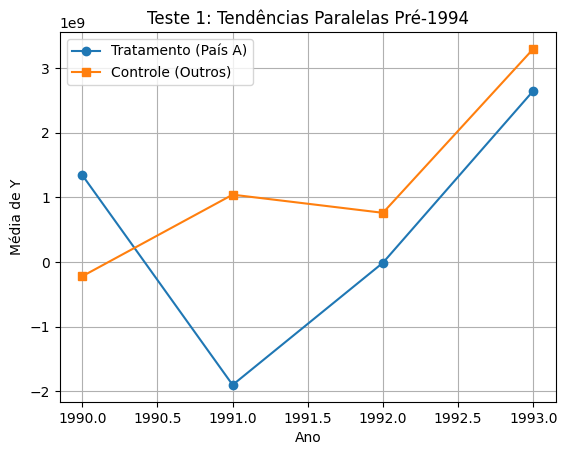

In [104]:
# MANEIRA 1
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("Panel101.dta")
df_pre = df[df['year'] < 1994].copy()
df_pre['grupo'] = df_pre['country'].apply(lambda x: 1 if x == 'A' else 0)

medias = df_pre.groupby(['year', 'grupo'])['y'].mean().reset_index()
pivot = medias.pivot(index='year', columns='grupo', values='y')
pivot.columns = ['Controle', 'Tratamento']

plt.plot(pivot.index, pivot['Tratamento'], marker='o', label='Tratamento (País A)')
plt.plot(pivot.index, pivot['Controle'], marker='s', label='Controle (Outros)')
plt.title('Teste 1: Tendências Paralelas Pré-1994')
plt.xlabel('Ano')
plt.ylabel('Média de Y')
plt.legend()
plt.grid(True)
plt.show()


**Explicação:** O código plota a média da variável de interesse (`y`) ao longo do tempo para o grupo de tratamento (país A) e para o grupo de controle (outros países), usando apenas os anos antes da intervenção (1994). Se as curvas seguem tendências semelhantes antes do tratamento, isso apoia a suposição de tendências paralelas — base central da validade do método DiD.


#### Maneira 2

In [105]:
# MANEIRA 2
import statsmodels.api as sm

df['grupo_placebo'] = df['country'].apply(lambda x: 1 if x == 'B' else 0)
df['pós'] = df['year'].apply(lambda x: 1 if x >= 1994 else 0)
df['inter_placebo'] = df['grupo_placebo'] * df['pós']

modelo_placebo = sm.OLS(df['y'], sm.add_constant(df[['grupo_placebo', 'pós', 'inter_placebo']])).fit()
print(modelo_placebo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.389
Date:                Sun, 15 Jun 2025   Prob (F-statistic):             0.0767
Time:                        19:08:30   Log-Likelihood:                -1623.1
No. Observations:                  70   AIC:                             3254.
Df Residuals:                      66   BIC:                             3263.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.535e+09   5.98e+08      2.569

**Explicação:** O código simula uma análise DiD utilizando um grupo de tratamento falso (país B), que não foi afetado pela intervenção. Se a interação (efeito placebo) não for estatisticamente significativa, isso indica que a metodologia não detecta efeitos quando não deveria, o que fortalece a validade da abordagem original.


#### Maneira 3

In [106]:
# MANEIRA 3
df['grupo'] = df['country'].apply(lambda x: 1 if x == 'A' else 0)
df['inter_x1'] = df['grupo'] * df['pós']

modelo_x1 = sm.OLS(df['x1'], sm.add_constant(df[['grupo', 'pós', 'inter_x1']])).fit()
print(modelo_x1.summary())


                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     3.895
Date:                Sun, 15 Jun 2025   Prob (F-statistic):             0.0126
Time:                        19:08:47   Log-Likelihood:                -39.977
No. Observations:                  70   AIC:                             87.95
Df Residuals:                      66   BIC:                             96.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5277      0.090      5.860      0.0

**Explicação:** Neste teste, a DiD é aplicada usando uma variável de resultado irrelevante (`x1`) no lugar da variável real (`y`). Um efeito de interação não significativo sugere que a abordagem DiD não gera falsos positivos em variáveis que não deveriam ser afetadas, servindo como evidência adicional da validade do método.



#### Maneira 4

In [108]:
# MANEIRA 4
if 'C' in df['country'].unique():
    df['grupo_C'] = df['country'].apply(lambda x: 1 if x == 'A' else (0 if x == 'C' else None))
    df_sub = df.dropna(subset=['grupo_C'])
    df_sub['grupo_C'] = df_sub['grupo_C'].astype(int)
    df_sub['inter_C'] = df_sub['grupo_C'] * df_sub['pós']

    modelo_C = sm.OLS(df_sub['y'], sm.add_constant(df_sub[['grupo_C', 'pós', 'inter_C']])).fit()
    print(modelo_C.summary())
else:
    print("País C não disponível no conjunto de dados.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     5.974
Date:                Sun, 15 Jun 2025   Prob (F-statistic):            0.00623
Time:                        19:09:43   Log-Likelihood:                -450.01
No. Observations:                  20   AIC:                             908.0
Df Residuals:                      16   BIC:                             912.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.597e+08      8e+08     -1.200      0.2

C:\Users\Ana Carolina\AppData\Local\Temp\ipykernel_10488\3726071414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['grupo_C'] = df_sub['grupo_C'].astype(int)
C:\Users\Ana Carolina\AppData\Local\Temp\ipykernel_10488\3726071414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['inter_C'] = df_sub['grupo_C'] * df_sub['pós']


**Explicação:** Aqui, a estimativa DiD é repetida utilizando um grupo de controle alternativo (por exemplo, país C). Se os resultados forem semelhantes aos obtidos com o grupo de controle original, isso reforça a robustez da suposição de tendências paralelas e da validade do efeito estimado.


## (5) Consumo de álcool x taxa de mortalidade 

As estatísticas relacionadas com o efeito do consumo de álcool são preocupan
tes, desde as elevadas taxas de mortalidade por acidentes de trânsito até pro
blemas de saúde, especialmente entre os jovens adultos. Nesta parte, você irá replicar um estudo realizado por Carpenter and Dobkin [2009] sobre o efeito do consumo de álcool nas taxas de mortalidade5. Os dados a serem usados podem ser obtidos em http://masteringmetrics.com/wp-content/uploads/2015/01/AEJfigs.dta. A Tabela 1 descreve as colunas desse conjunto de dados.


| Variável        | Descrição                                                                 |
|-----------------|---------------------------------------------------------------------------|
| `agecell`       | Idade do indivíduo (o estudo se concentra em adultos entre 19 e 22 anos) |
| `all`           | Taxa de mortalidade geral                                                 |
| `alcohol`       | Taxa de mortalidade por causas relacionadas ao álcool                    |
| `homicide`      | Taxa de mortalidade por homicídios                                        |
| `suicide`       | Taxa de mortalidade por suicídio                                          |
| `mva`           | Taxa de mortalidade por acidentes de carro                                |
| `drugs`         | Taxa de mortalidade por causas relacionadas a drogas (excluindo álcool)  |
| `externalother` | Taxa de mortalidade por outras causas externas  

A descontinuidade de regressão é um desenho apropriado para estudar estas questões, uma vez que os jovens adultos são “naturalmente” selecionados em dois grupos com base na sua idade: os jovens adultos com menos de 216 anos não estão legalmente autorizados a beber, enquanto os jovens adultos com mais de 21 anos são legalmente proibidos de beber. Podemos comparar a taxa de mortalidade entre esses dois grupos.

#### (i) Reproduza o gráfico apresentado na Figura 3 do estudo acima mencionado.

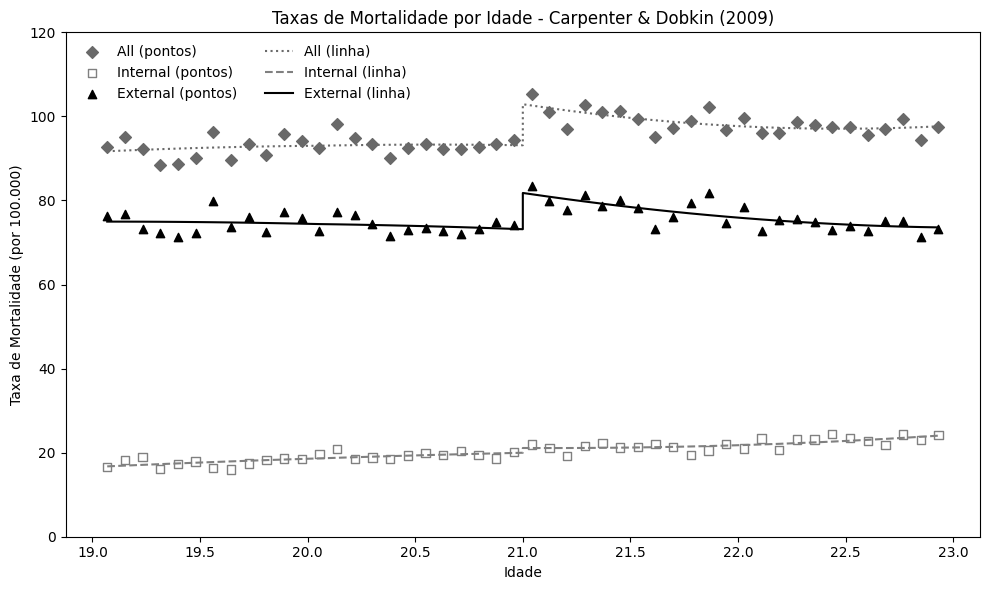

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

#carrega os dados
df = pd.read_stata("AEJfigs.dta")

#cria a figura
plt.figure(figsize=(10, 6))

#all
scatter_all = plt.scatter(df['agecell'], df['all'], marker='D', color='dimgray', label='All (pontos)')
line_all = plt.plot(df['agecell'], df['allfitted'], linestyle=':', color='dimgray', label='All (linha)')

#internal
scatter_internal = plt.scatter(df['agecell'], df['internal'], marker='s', facecolors='none', edgecolors='gray', label='Internal (pontos)')
line_internal = plt.plot(df['agecell'], df['internalfitted'], linestyle='--', color='gray', label='Internal (linha)')

#external
scatter_external = plt.scatter(df['agecell'], df['external'], marker='^', color='black', label='External (pontos)')
line_external = plt.plot(df['agecell'], df['externalfitted'], linestyle='-', color='black', label='External (linha)')

#eixos
plt.xlabel("Idade")
plt.ylabel("Taxa de Mortalidade (por 100.000)")
plt.title("Taxas de Mortalidade por Idade - Carpenter & Dobkin (2009)")

plt.xticks(ticks=[i / 2 for i in range(38, 47)], labels=[f"{i/2:.1f}" for i in range(38, 47)])
plt.yticks(ticks=range(0, 121, 20))
plt.grid(False)

#legenda
handles, labels = plt.gca().get_legend_handles_labels()

#agrupa por variaveis
legend_order = [
    0, 2, 4,  # ícones
    1, 3, 5   # linhas
]

#personaliza a legenda
plt.legend([handles[i] for i in legend_order],
           [labels[i] for i in legend_order],
           ncol=2,
           loc='upper left',
           frameon=False)

plt.tight_layout()
plt.show()


**Explicação:** 

O código começa carregando o dataset com `pd.read_stata()`. Em seguida, ele separa e plota os três tipos de mortalidade: **All**, **Internal** e **External**. Para cada um deles, são desenhados os pontos observados com `plt.scatter()` e as linhas ajustadas com `plt.plot()`. O grupo **All** é representado por losangos cinza com linha pontilhada (`':'`), o grupo **Internal** por quadrados vazados com linha tracejada (`'--'`), e o grupo **External** por triângulos pretos com linha contínua (`'-'`). Cada visualização recebe um rótulo diferente na legenda. 





#### (ii) Execute uma regressão descontínua para “todas” as mortes por idade (não me refiro a todas as variáveis, apenas à variável chamada all). Analise os resultados. Como você usa esses resultados para estimar a relação entre consumo de álcool e mortalidade? Nota: O conjunto de dados fornecido possui menos do que 50 observações. Sendo assim, não espere reproduzir exatamente os resultados das tabelas do artigo, que usa um conjunto de dados completo de 1.500 observações. Além disso, você também não tem as mesmas variáveis.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

#cria a variável de tratamento: 1 se idade >= 21, 0 caso contrário
df['treat'] = (df['agecell'] >= 21).astype(int)

#cria variável centralizada em torno do ponto de corte (21 anos)
df['age_c'] = df['agecell'] - 21

#regressão com descontinuidade: y = β0 + β1*treat + β2*age_c + β3*treat*age_c + ε
modelo = smf.ols('all ~ treat + age_c + treat:age_c', data=df).fit()

#exibe o resumo dos resultados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     29.47
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.33e-10
Time:                        20:08:54   Log-Likelihood:                -105.64
No. Observations:                  48   AIC:                             219.3
Df Residuals:                      44   BIC:                             226.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      93.6184      0.932    100.399      

**Explicação:**

O código cria uma variável indicadora (`above21`) que vale 1 para idades iguais ou superiores a 21 anos e 0 caso contrário. Em seguida, define o desvio da idade em relação ao ponto de corte (21 anos) com `age_minus_21`, o que permite capturar a tendência linear antes e depois da idade legal para consumo de álcool. A regressão é feita com `statsmodels.OLS()` usando essas variáveis como preditoras. O objetivo é verificar se há um salto significativo na taxa de mortalidade ao cruzar a idade mínima legal para beber, o que pode ser interpretado como evidência de que o consumo de álcool tem impacto direto na mortalidade.

**Interpretação:**

A regressão mostra um aumento significativo de 7,66 mortes por 100 mil ao atingir 21 anos, sugerindo que o acesso legal ao álcool eleva a mortalidade. A interação negativa indica queda na tendência após essa idade. O modelo tem bom ajuste (R² = 0.668).

#### (iii) Produza o gráfico todas as variáveis por idade e adicione as linhas de regressão definidas pelo resultado da regressão (não há problema se as linhas se estenderem por toda a figura). O gráfico que você deve produzir aqui deve ser semelhante ao apresentado na Figura 1

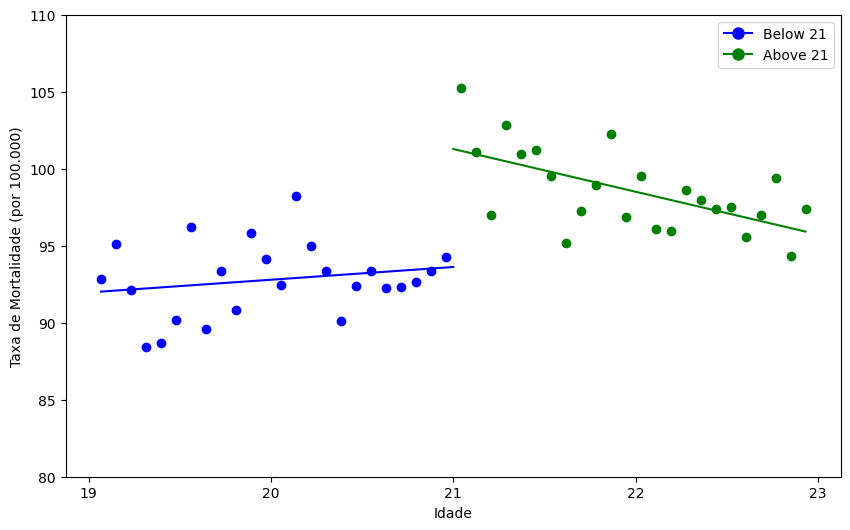

In [125]:
df['fitted'] = modelo.predict(df)

plt.figure(figsize=(10, 6))

#pontos para below 21 (agecell < 21)
below_21 = df[df['agecell'] < 21]
plt.scatter(below_21['agecell'], below_21['all'], marker='o', color='blue')
#linha de regressao
plt.plot(below_21['agecell'], below_21['fitted'], color='blue')

#pontos para above 21 (agecell >= 21)
above_21 = df[df['agecell'] >= 21]
plt.scatter(above_21['agecell'], above_21['all'], marker='o', color='green')
#linha de regressao
plt.plot(above_21['agecell'], above_21['fitted'], color='green')

#eixos
plt.xlabel("Idade")
plt.ylabel("Taxa de Mortalidade (por 100.000)")

#intervalos
plt.xticks(range(19, 24, 1))
plt.yticks(range(80, 111, 5))

#legenda personalizada
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', markersize=8, label='Below 21'),
    Line2D([0], [0], marker='o', color='green', markerfacecolor='green', markersize=8, label='Above 21'),
    
]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

**Explicação:**

O código gera um gráfico de dispersão com as taxas de mortalidade (`all`) por idade, separando os dados em dois grupos: abaixo de 21 anos (representado em azul) e acima de 21 anos (representado em verde). Para cada grupo, são plotados os pontos de dados e as linhas de regressão ajustadas, calculadas a partir de um modelo de regressão descontínua. A variável `fitted` contém as previsões do modelo para cada observação. 
